In [92]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
pd.options.mode.chained_assignment = None
from glob import glob

import sys
sys.path.append('../python')
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [93]:
def fiducial_cuts(df):
    df = df[df.g < 20.2] # reduces streaking 
    df = df[(0.5 <= df['b-r']) & (df['b-r'] <= 1)] # cold stellar streams in particular
    df = df[(np.abs(df['μ_ϕcosλ']) > 2) | (np.abs(df['μ_λ']) > 2)] # exclude stars near 0 proper motion
    return df

# Figure 1

In [94]:
df_fullpatch = load_file()

100%|██████████| 1985/1985 [00:41<00:00, 48.13it/s]


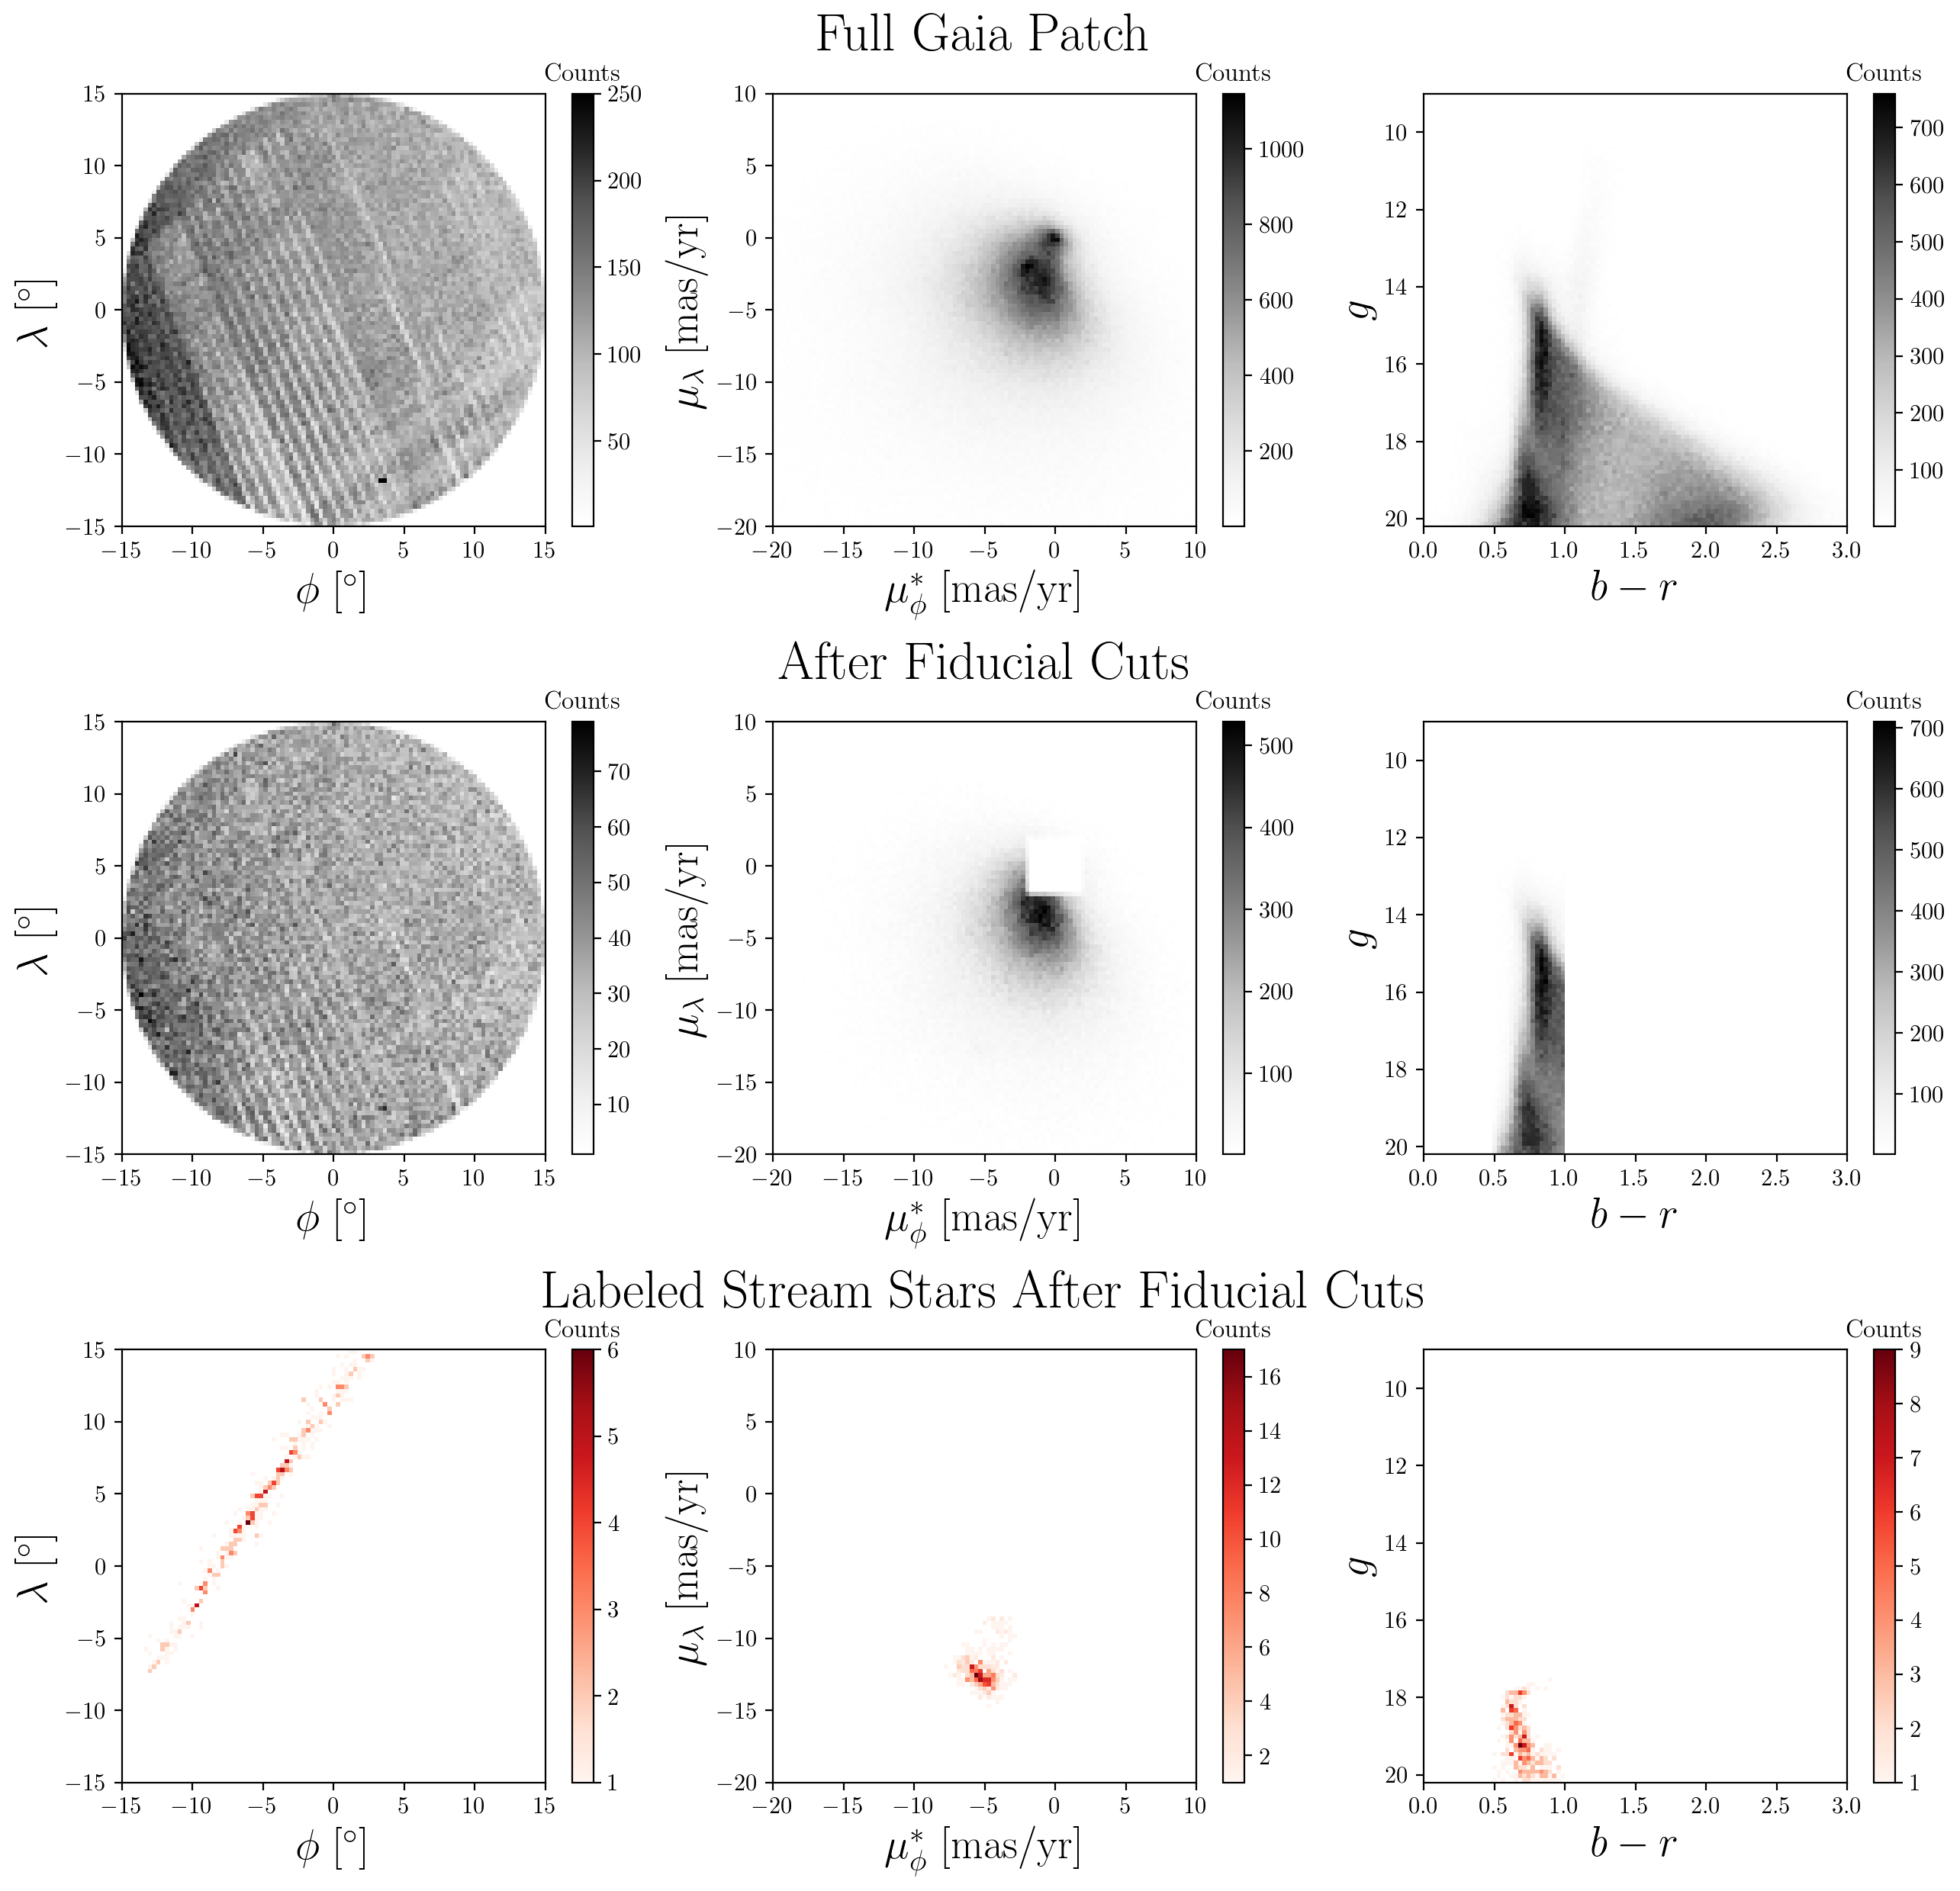

In [95]:
fig = plt.figure(figsize=(13,12.5), dpi=200, tight_layout=True)

cmap = 'Greys'
bins_0 = (np.linspace(-15,15,100), np.linspace(-15,15,100))
bins_1 = (np.linspace(-20,10,100), np.linspace(-20,10,100))
bins_2 = (np.linspace(0,3,100),np.linspace(9,20.2,100))

df = df_fullpatch

ax = fig.add_subplot(331)
h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, vmax=250, bins=bins_0)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(332)
h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('Full Gaia Patch', fontsize=25, pad=20)

ax = fig.add_subplot(333)
h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

df = fiducial_cuts(df)

ax = fig.add_subplot(334)
h = ax.hist2d(df['ϕ'], df['λ'], cmap=cmap, cmin=1, bins=bins_0)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(335)
h = ax.hist2d(df['μ_ϕcosλ'], df['μ_λ'], cmap=cmap, cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('After Fiducial Cuts', fontsize=25, pad=20)

ax = fig.add_subplot(336)
h = ax.hist2d(df['b-r'], df['g'], cmap=cmap, cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.set_ylim(9,20.2)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(337)
h = ax.hist2d(df[df.stream]['ϕ'], df[df.stream]['λ'], cmap='Reds', bins=bins_0, cmin=1)
ax.set_xlabel(r'$\phi~[^\circ]$',fontsize=20)
ax.set_ylabel(r'$\lambda~[^\circ]$',fontsize=20)
ax.set_xlim(-15,15);
ax.set_ylim(-15,15);
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);

ax = fig.add_subplot(338)
h = ax.hist2d(df[df.stream]['μ_ϕcosλ'], df[df.stream]['μ_λ'], cmap='Reds', cmin=1, bins=bins_1)
ax.set_xlim(-20,10)
ax.set_ylim(-20,10)
ax.set_xlabel(r'$\mu_\phi^*$ [mas/yr]',fontsize=20)
ax.set_ylabel(r'$\mu_\lambda$ [mas/yr]',fontsize=20)
c = fig.colorbar(h[3], ax=ax)
c.ax.set_title('Counts', fontsize=12);
ax.set_title('Labeled Stream Stars After Fiducial Cuts', fontsize=25, pad=20)

ax = fig.add_subplot(339)
h = ax.hist2d(df[df.stream]['b-r'], df[df.stream]['g'], cmap='Reds', cmin=1, bins=bins_2)
ax.set_xlabel(r'$b-r$',fontsize=20)
ax.set_ylabel(r'$g$',fontsize=20)
ax.set_xlim(0,3)
ax.set_ylim(9,20.2)
ax.invert_yaxis()
c = fig.colorbar(h[3], ax=ax);
c.ax.set_title('Counts', fontsize=12);

plt.savefig(os.path.join("../plots/input_variables.pdf"))

# Figure 3

SR factor: 1
SB factor: 3
Scanning over μ_λ
Sideband region: [-15.8,-13.6) & (-11.4,-9.3]
Signal region: [-13.6,-11.4]
Total counts: SR = 14,016, SB = 30,836
Signal region has 336 stream and 13,680 bkg events (2.46%).
Sideband region has 402 stream and 44,450 bkg events (0.90%).
f_sig = 2.7X f_sideband.


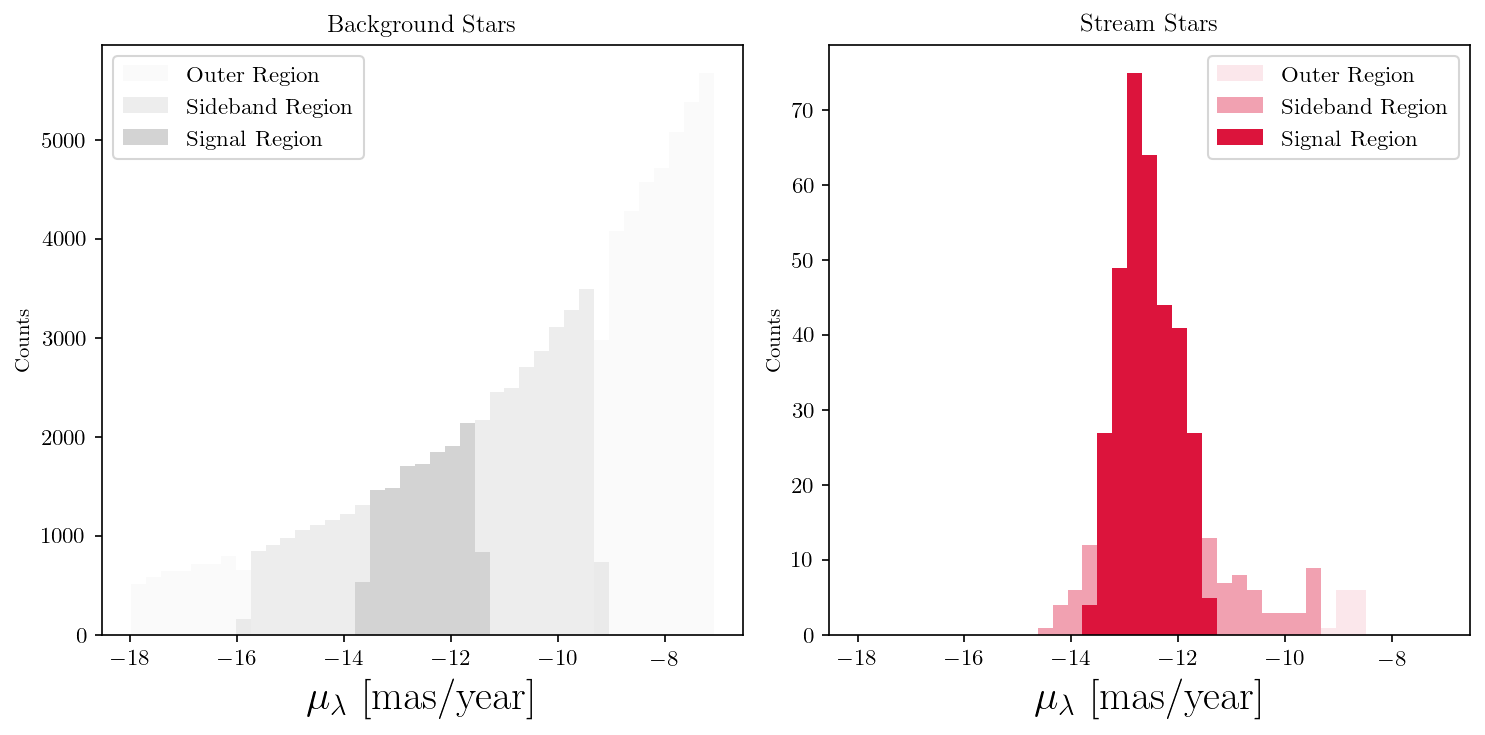

In [96]:
df_slice = signal_sideband(df, save_folder="../plots")

# Figure 4


9,021 true GD-1 stars pass fiducial cuts.
5,250 stars are identified by CWoLa, of which 2,769 belong to GD-1.

Purity = 53% in top CWoLa-identified stars
Completeness = 31% vs. all of GD-1


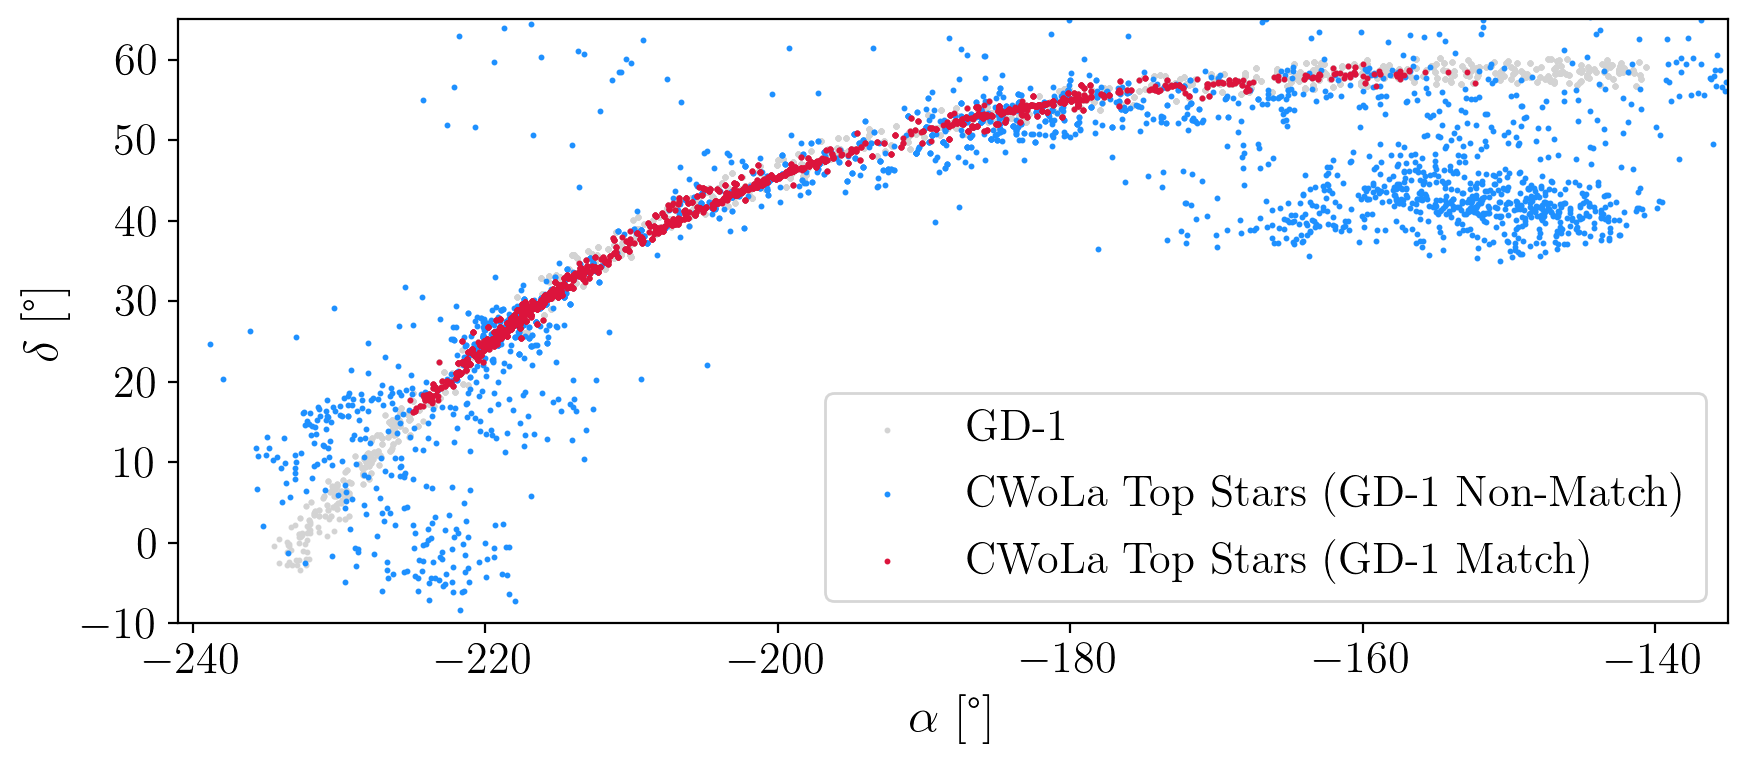

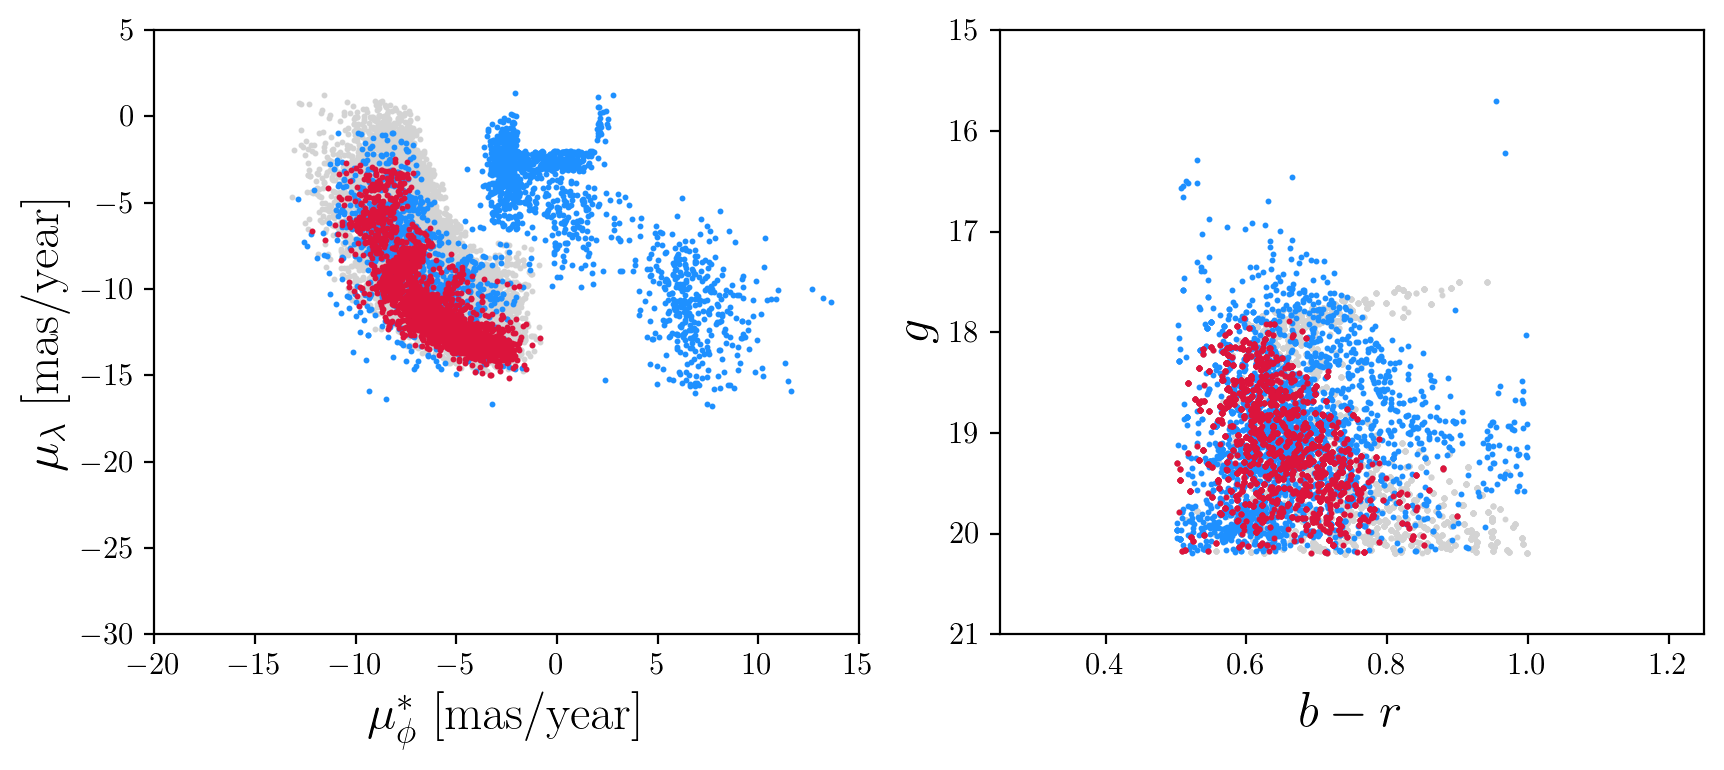

In [381]:
all_gd1_stars = []
all_cwola_stars = []

files = sorted(glob("../trained_models/new_sr1_sb3_gpu/patches/patch*/df_test.h5"))

for file in files: # use all files to create stream stars
    test = pd.read_hdf(file)
    test = fiducial_cuts(test)
    all_gd1_stars.append(test[test.stream])    

for file in files:
    test = pd.read_hdf(file)
    test = fiducial_cuts(test)
    n_top_stars = 250
    patch_top_stars = test.sort_values('nn_score',ascending=False)[:n_top_stars]
    all_cwola_stars.append(patch_top_stars)
    
all_gd1_stars = pd.concat([df for df in all_gd1_stars])
all_cwola_stars = pd.concat([df for df in all_cwola_stars])

all_gd1_stars['α'] = all_gd1_stars['α']-360
all_cwola_stars['α'] = all_cwola_stars['α']-360
    
markersize = 5
plt.figure(dpi=200, figsize=(10,4))
plt.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
plt.scatter(all_cwola_stars[all_cwola_stars.stream == False].α_wrapped - 360, all_cwola_stars[all_cwola_stars.stream == False].δ, marker='.', s=markersize, 
             color='dodgerblue',  label="CWoLa Top Stars (GD-1 Non-Match)")
plt.scatter(all_cwola_stars[all_cwola_stars.stream].α_wrapped - 360, all_cwola_stars[all_cwola_stars.stream].δ, marker='.', s=markersize, 
            color="crimson", label="CWoLa Top Stars (GD-1 Match)")
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\delta$ [\textdegree]", fontsize=18);
# plt.xlim(120,220);
plt.xlim(-241,-135);
plt.ylim(-10,65);

print("\n{:,} true GD-1 stars pass fiducial cuts.".format(all_gd1_stars.shape[0]))
print("{:,} stars are identified by CWoLa, of which {:,} belong to GD-1.".format(all_cwola_stars.shape[0], len(all_cwola_stars[all_cwola_stars.stream])))

print("\nPurity = {:.0f}% in top CWoLa-identified stars".format(100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_cwola_stars)))
print("Completeness = {:.0f}% vs. all of GD-1".format(100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_gd1_stars)))

markersize = 5
fig, axs = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10,4))

ax = axs[0]
ax.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==False]['μ_ϕcosλ'], all_cwola_stars[all_cwola_stars.stream==False].μ_λ, marker='.', s=markersize, 
              color='dodgerblue', label="CWoLa Top Stars (Non-Match)")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==True]['μ_ϕcosλ'], all_cwola_stars[all_cwola_stars.stream==True].μ_λ, marker='.', s=markersize, 
             color="crimson", label="CWoLa Top Stars (Match)")
ax.set_xlabel(r"$\mu_\phi^*$ [mas/year]", fontsize=18);
ax.set_ylabel(r"$\mu_\lambda$ [mas/year]", fontsize=18);
ax.set_xlim(-20,15);
ax.set_ylim(-30,5);

ax = axs[1]
ax.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, marker='.', s=markersize, 
            color="lightgray", label="GD-1")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==False]['b-r'], all_cwola_stars[all_cwola_stars.stream==False].g, marker='.', s=markersize, 
            color='dodgerblue', label="CWoLa Top Stars (Non-Match)")
ax.scatter(all_cwola_stars[all_cwola_stars.stream==True]['b-r'], all_cwola_stars[all_cwola_stars.stream==True].g, marker='.', s=markersize, 
            color='crimson', label="CWoLa Top Stars (Match)")
ax.set_xlabel(r"$b-r$", fontsize=18);
ax.set_ylabel(r"$g$", fontsize=18);
ax.set_xlim(0.25,1.25);
ax.set_ylim(15,21);
ax.invert_yaxis()

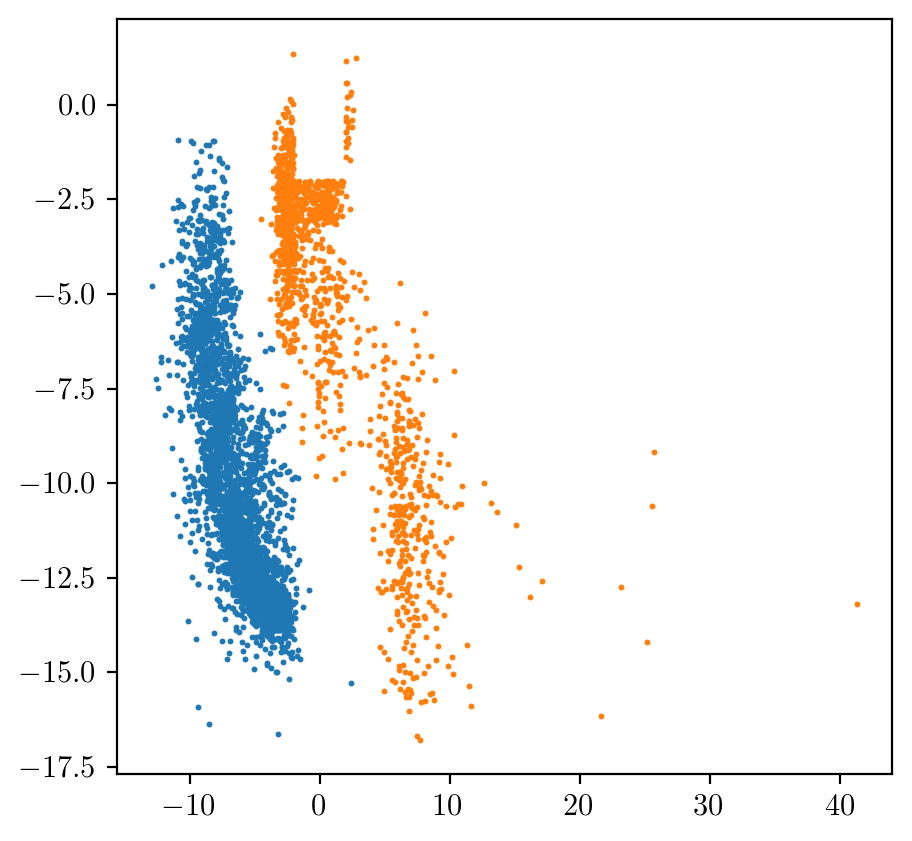

In [382]:
plt.figure(figsize=(5,5), dpi=200)
df = all_cwola_stars
X = np.array(df[['μ_ϕcosλ', 'μ_λ']])

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 0], 
            df['μ_λ'][kmeans.labels_ == 0], marker='.', s=markersize);
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 1], 
            df['μ_λ'][kmeans.labels_ == 1], marker='.', s=markersize);
plt.scatter(df['μ_ϕcosλ'][kmeans.labels_ == 2], 
            df['μ_λ'][kmeans.labels_ == 2], marker='.', s=markersize);

In [383]:
### Choose the cluster with the largest number of stars
all_cwola_stars = all_cwola_stars[kmeans.labels_ == np.argmax([np.sum(kmeans.labels_ == 0), np.sum(kmeans.labels_ == 1)])]

### We're gonna want to save a version of this with duplicates included for the patch-by-patch plot
all_cwola_stars_with_duplicates = all_cwola_stars.copy()
all_gd1_stars_with_duplicates = all_gd1_stars.copy()

### Remove duplicates
all_gd1_stars.reset_index(inplace=True)
all_gd1_stars.drop_duplicates(subset = 'index')
all_gd1_stars.drop_duplicates(subset=['α','δ', 'μ_α', 'μ_δ', 'b-r', 'g'], inplace=True)

all_cwola_stars.reset_index(inplace=True)
all_cwola_stars.drop_duplicates(subset = 'index')
all_cwola_stars.drop_duplicates(subset=['α','δ', 'μ_α', 'μ_δ', 'b-r', 'g'], inplace=True)

In [384]:
print("\n{:,} true GD-1 stars pass fiducial cuts.".format(all_gd1_stars.shape[0]))
print("{:,} stars are identified by CWoLa, of which {:,} belong to GD-1.".format(all_cwola_stars.shape[0], len(all_cwola_stars[all_cwola_stars.stream])))

purity = 100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_cwola_stars)
completeness = 100*len(all_cwola_stars[all_cwola_stars.stream])/len(all_gd1_stars)

print("\nPurity = {:.0f}% in top CWoLa-identified stars".format(purity))
print("Completeness = {:.0f}% vs. all of GD-1".format(completeness))


1,498 true GD-1 stars pass fiducial cuts.
1,360 stars are identified by CWoLa, of which 760 belong to GD-1.

Purity = 56% in top CWoLa-identified stars
Completeness = 51% vs. all of GD-1


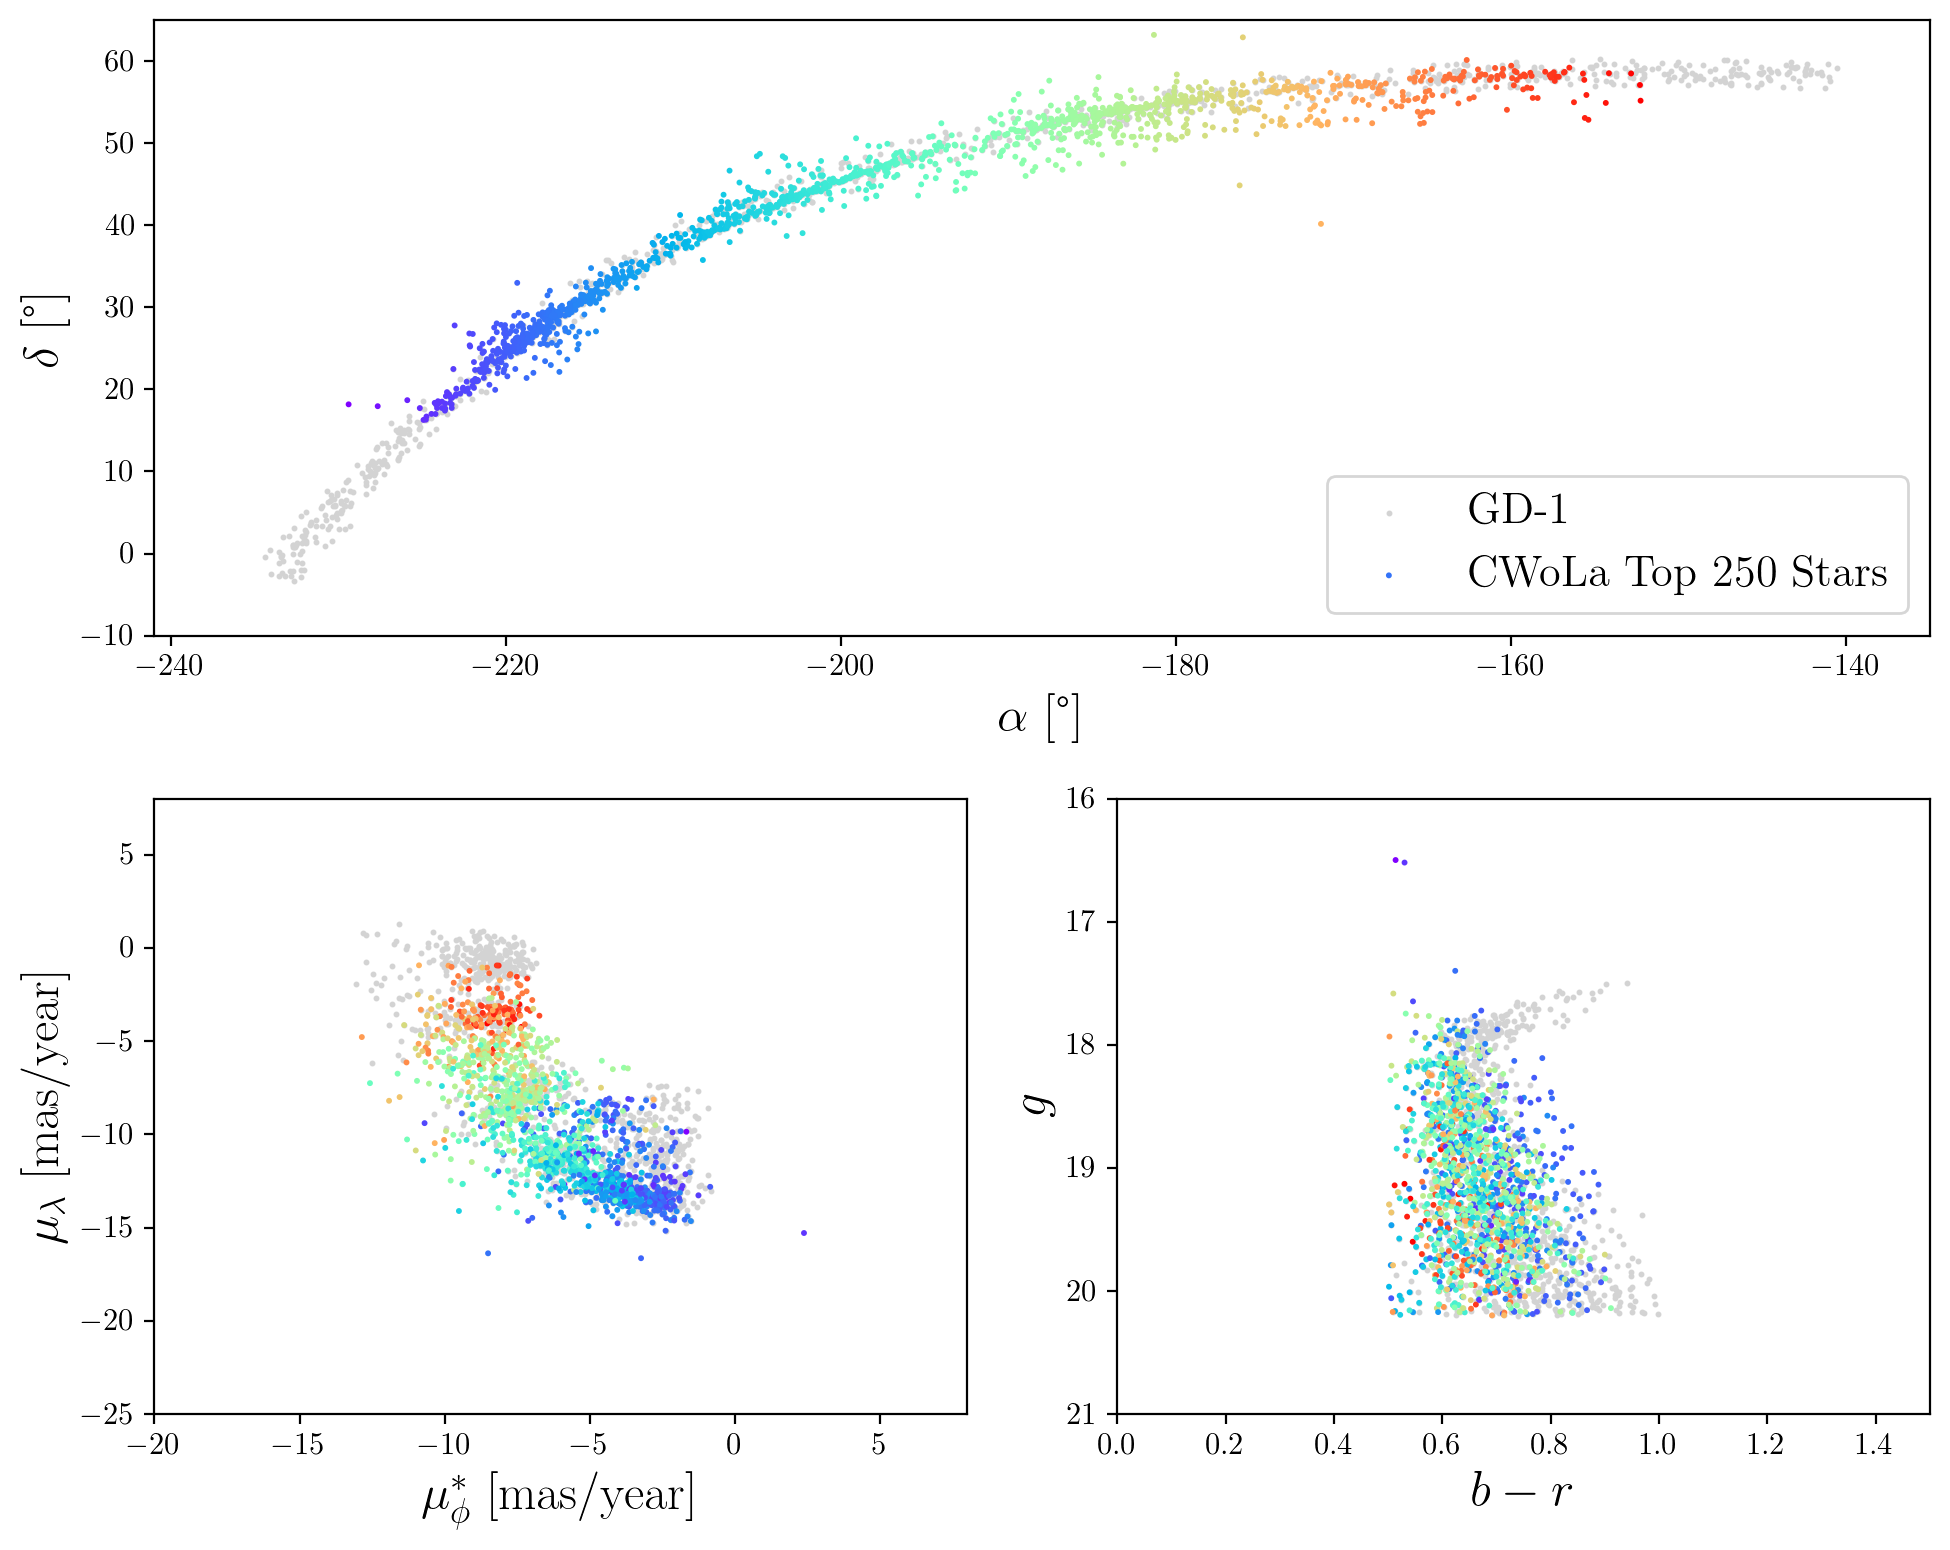

In [385]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10,8), dpi=200, tight_layout=True)
gs = GridSpec(2,2) # 2 rows, 3 columns

ax1 = fig.add_subplot(gs[0,:]) # Second row, span all columns
ax2 = fig.add_subplot(gs[1,0]) # First row, first column
ax3 = fig.add_subplot(gs[1,1]) # First row, second column

markersize = 5
ax1.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, marker='.', s=markersize, color="lightgray", label="GD-1")
ax1.scatter(all_cwola_stars.α_wrapped - 360, all_cwola_stars.δ, marker='.', s=markersize, c=all_cwola_stars.α_wrapped - 360, cmap='rainbow',  
            label="CWoLa Top 250 Stars")
ax1.legend(fontsize=16)
ax1.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
ax1.set_ylabel(r"$\delta$ [\textdegree]", fontsize=18);
ax1.set_xlim(-241,-135);
ax1.set_ylim(-10,65);

ax2.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ, marker='.', s=markersize, color="lightgray", label="GD-1")
ax2.scatter(all_cwola_stars['μ_ϕcosλ'], all_cwola_stars.μ_λ, marker='.', s=markersize, 
              c=all_cwola_stars.α_wrapped - 360, cmap='rainbow', label="CWoLa Top Stars")
ax2.set_xlabel(r"$\mu_\phi^*$ [mas/year]", fontsize=18);
ax2.set_ylabel(r"$\mu_\lambda$ [mas/year]", fontsize=18);
ax2.set_xlim(-20,8);
ax2.set_ylim(-25,8);

ax3.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, marker='.', s=markersize, color="lightgray", label="GD-1")
ax3.scatter(all_cwola_stars['b-r'], all_cwola_stars.g, marker='.', s=markersize, 
            c=all_cwola_stars.α_wrapped - 360, cmap='rainbow', label="CWoLa Top Stars")
ax3.set_xlabel(r"$b-r$", fontsize=18);
ax3.set_ylabel(r"$g$", fontsize=18);
ax3.set_xlim(0,1.5);
ax3.set_ylim(16,21);
ax3.invert_yaxis()
plt.savefig('../plots/rainbow.pdf')

# Figure 6

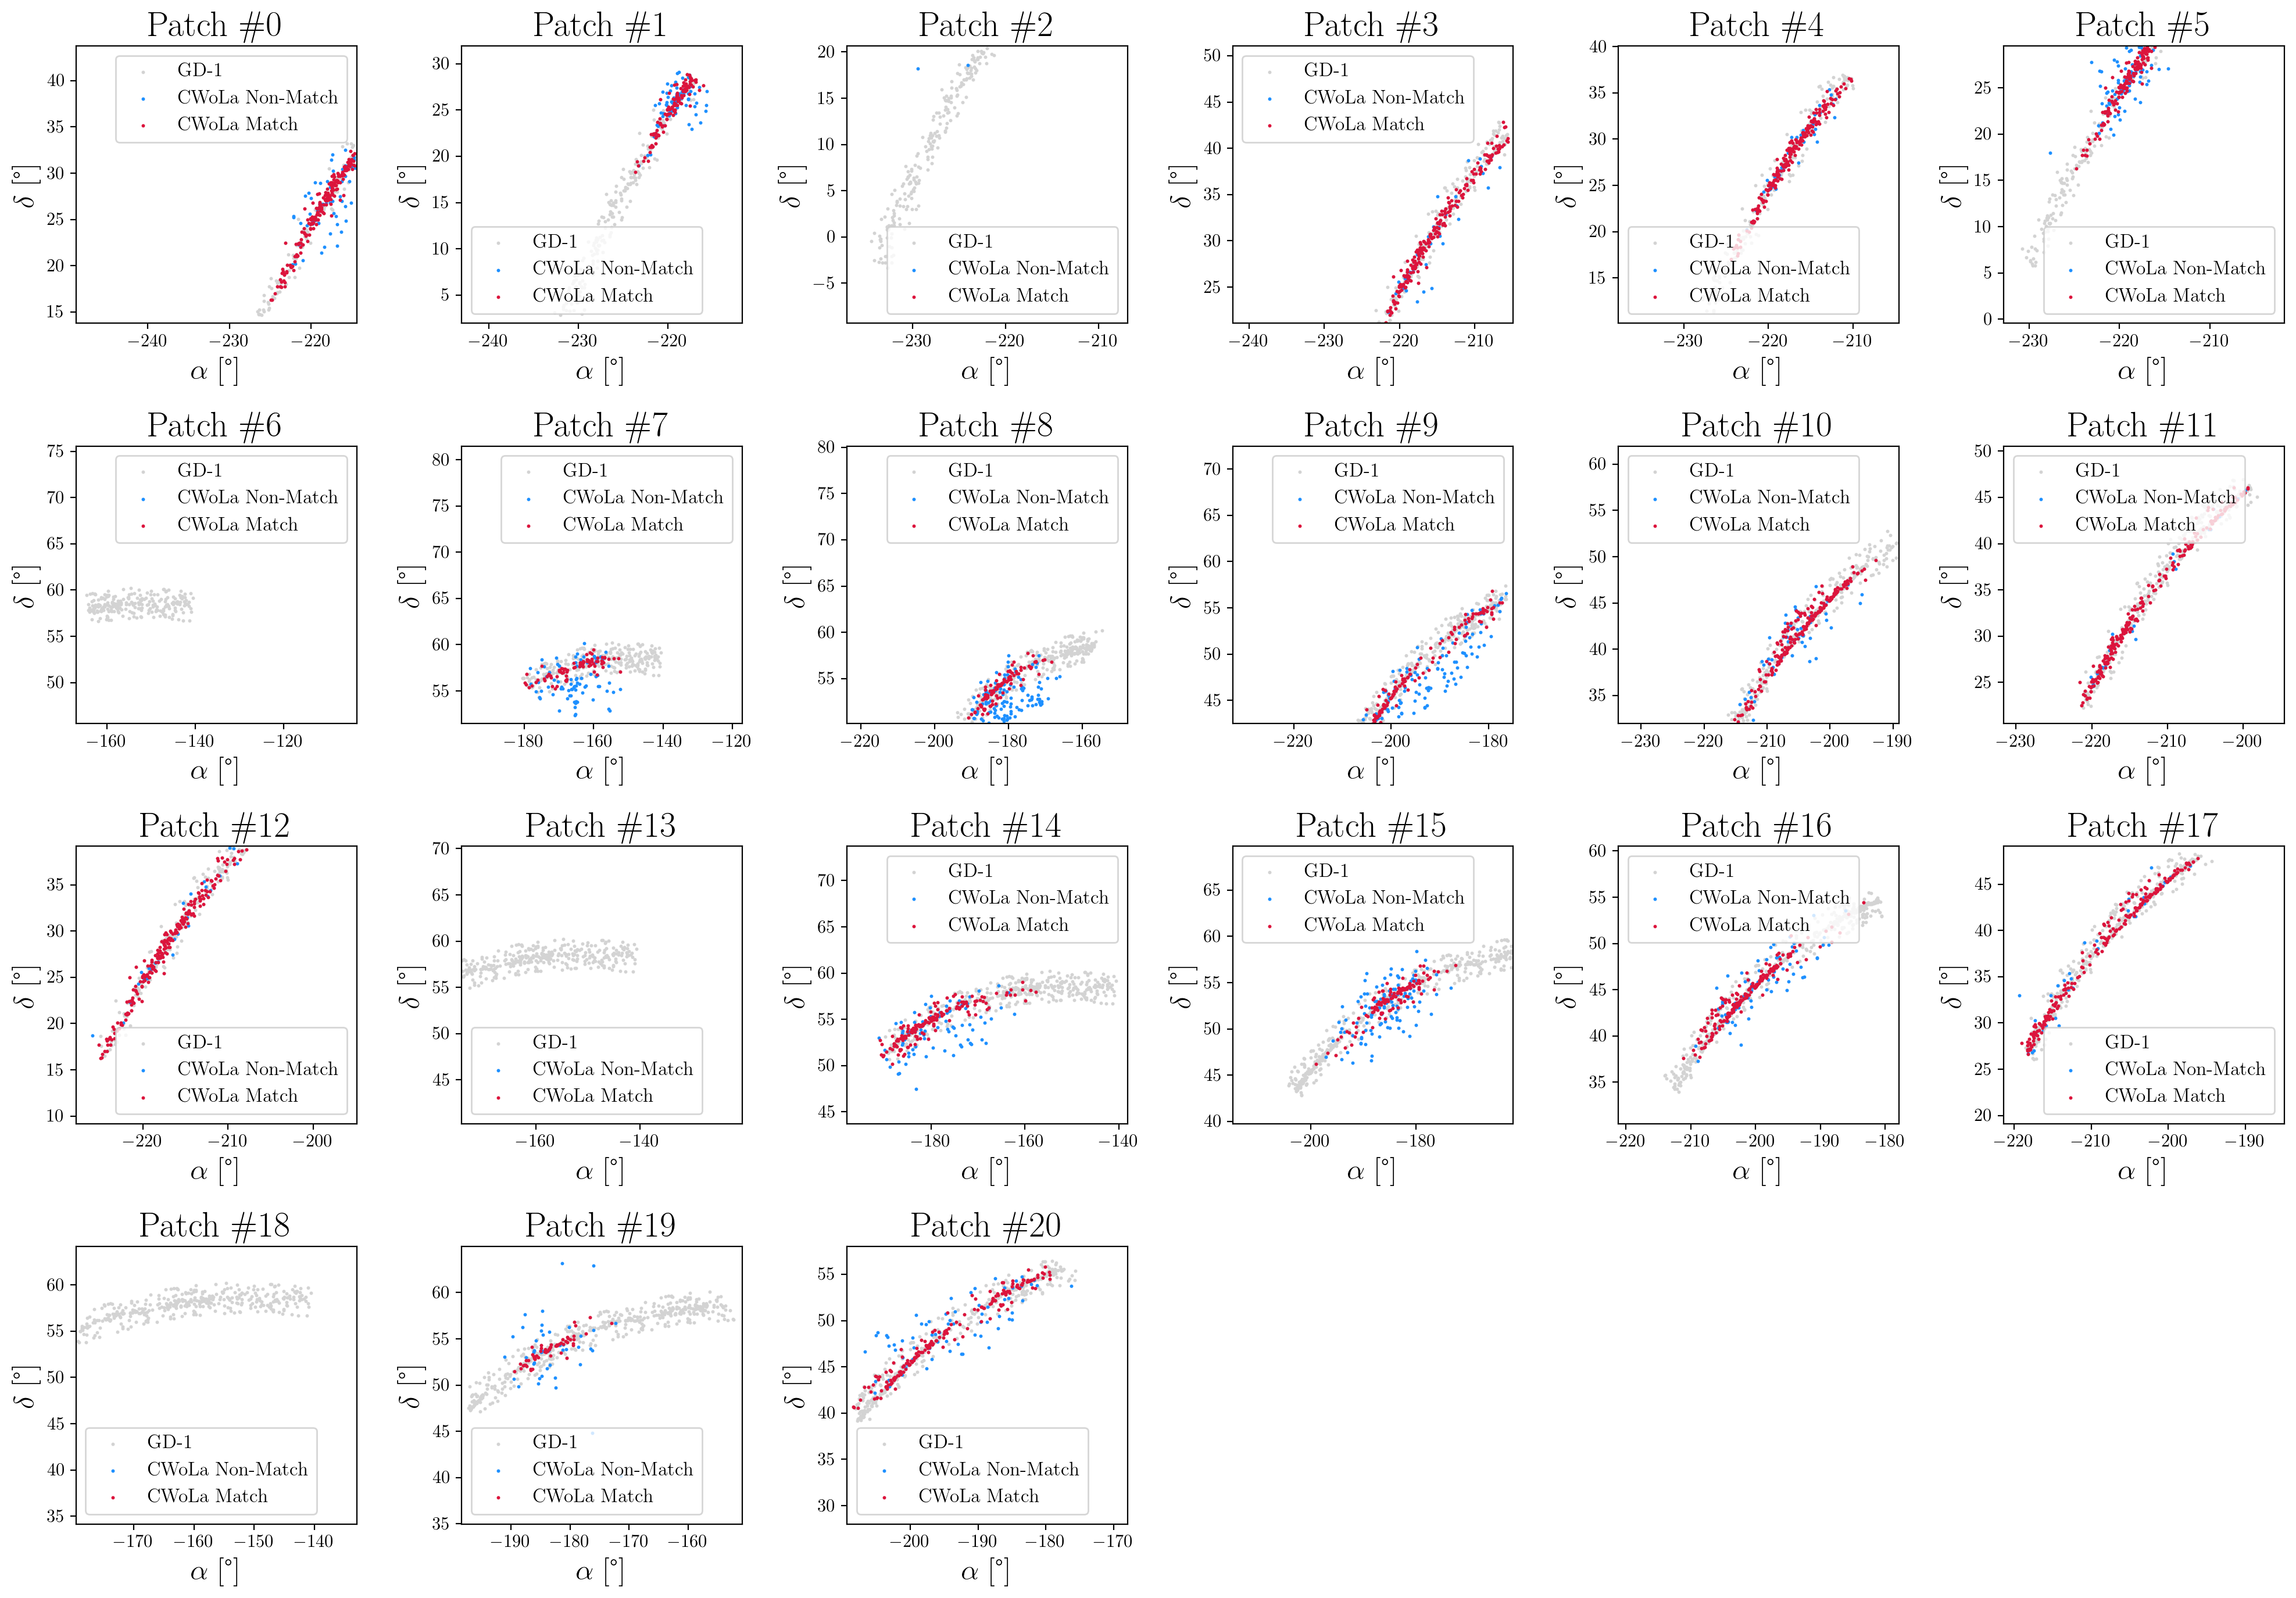

In [386]:
α_limits = []
δ_limits = []

for file in files:
    test = pd.read_hdf(file)
    α_min, α_max = np.min(test.α_wrapped - 360), np.max(test.α_wrapped - 360)
    δ_min, δ_max = np.min(test.δ), np.max(test.δ)
    α_limits.append([α_min, α_max])
    δ_limits.append([δ_min, δ_max])
    
fig, axs = plt.subplots(figsize=(20,14), nrows=4, ncols=6, dpi=200, tight_layout=True)
plt.subplots_adjust(hspace=0.5)

for i, ax in zip(np.arange(21), axs.ravel()):
    stream = all_gd1_stars_with_duplicates[all_gd1_stars_with_duplicates.patch_id == i]
    cwola = all_cwola_stars_with_duplicates[all_cwola_stars_with_duplicates.patch_id == i]
    
    markersize = 5
    ax.scatter(stream.α_wrapped - 360, stream.δ, marker='.', s=markersize, color="lightgrey", label="GD-1")
    ax.scatter(cwola[cwola.stream == False].α_wrapped - 360, cwola[cwola.stream == False].δ, marker='.', s=markersize, color="dodgerblue", label="CWoLa Non-Match")
    ax.scatter(cwola[cwola.stream].α_wrapped - 360, cwola[cwola.stream].δ, marker='.', s=markersize, color="crimson", label="CWoLa Match")
    ax.legend(fontsize=12)
    ax.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=18);
    ax.set_ylabel(r"$\delta$ [\textdegree]", fontsize=18);
    ax.set_xlim(α_limits[i][0], α_limits[i][1]);
    ax.set_ylim(δ_limits[i][0], δ_limits[i][1]);
    ax.set_title("Patch \#{}".format(i), fontsize=22);
    
fig.delaxes(axs[3][3])
fig.delaxes(axs[3][4])
fig.delaxes(axs[3][5])    
plt.savefig('../plots/patch_by_patch.pdf')

# Figure 7

In [387]:
import astropy.units as u
from gala.coordinates import GD1Koposov10
from astropy.coordinates import SkyCoord

In [388]:
gd1_frame = GD1Koposov10()

### All GD-1 stars
coord_icrs = SkyCoord(ra=(all_gd1_stars['α_wrapped'] - 360)*u.degree, dec=all_gd1_stars.δ*u.degree, frame='icrs')
coord_gd1 = coord_icrs.transform_to(gd1_frame)
all_gd1_stars['ϕ1'] = coord_gd1.phi1.degree
all_gd1_stars['ϕ2'] = coord_gd1.phi2.degree

### CWoLa stars
coord_icrs = SkyCoord(ra=(all_cwola_stars['α_wrapped'] - 360)*u.degree, dec=all_cwola_stars.δ*u.degree, frame='icrs')
coord_gd1 = coord_icrs.transform_to(gd1_frame)
all_cwola_stars['ϕ1'] = coord_gd1.phi1.degree
all_cwola_stars['ϕ2'] = coord_gd1.phi2.degree

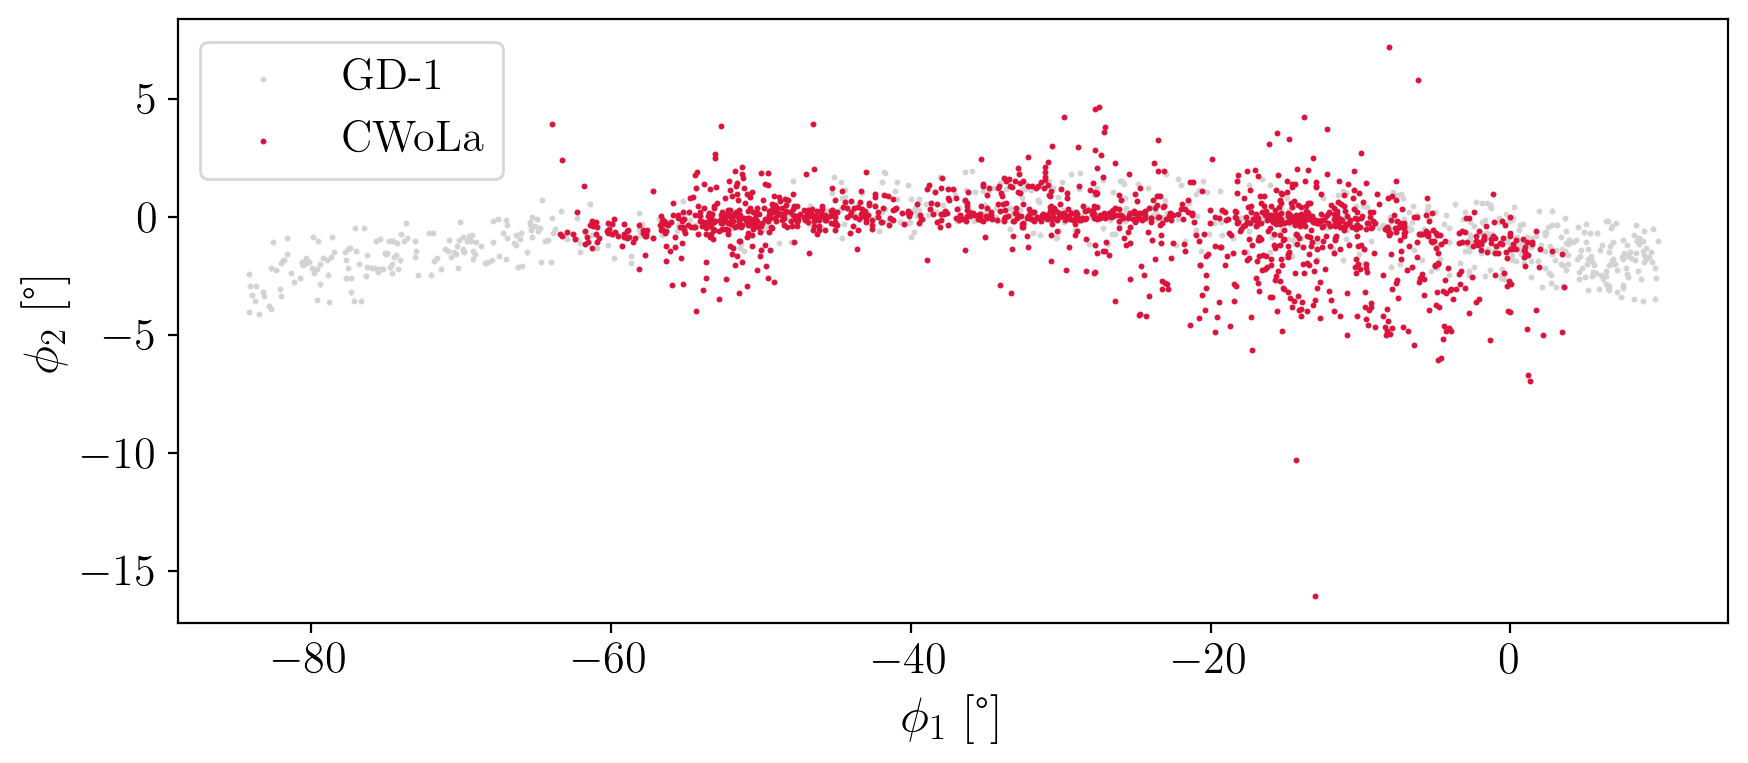

In [389]:
markersize = 5
plt.figure(dpi=200, figsize=(10,4))
plt.scatter(all_gd1_stars['ϕ1'], all_gd1_stars['ϕ2'], marker='.', s=markersize, color="lightgray", label="GD-1")
plt.scatter(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], marker='.', s=markersize, color="crimson", label="CWoLa")
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
plt.ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);

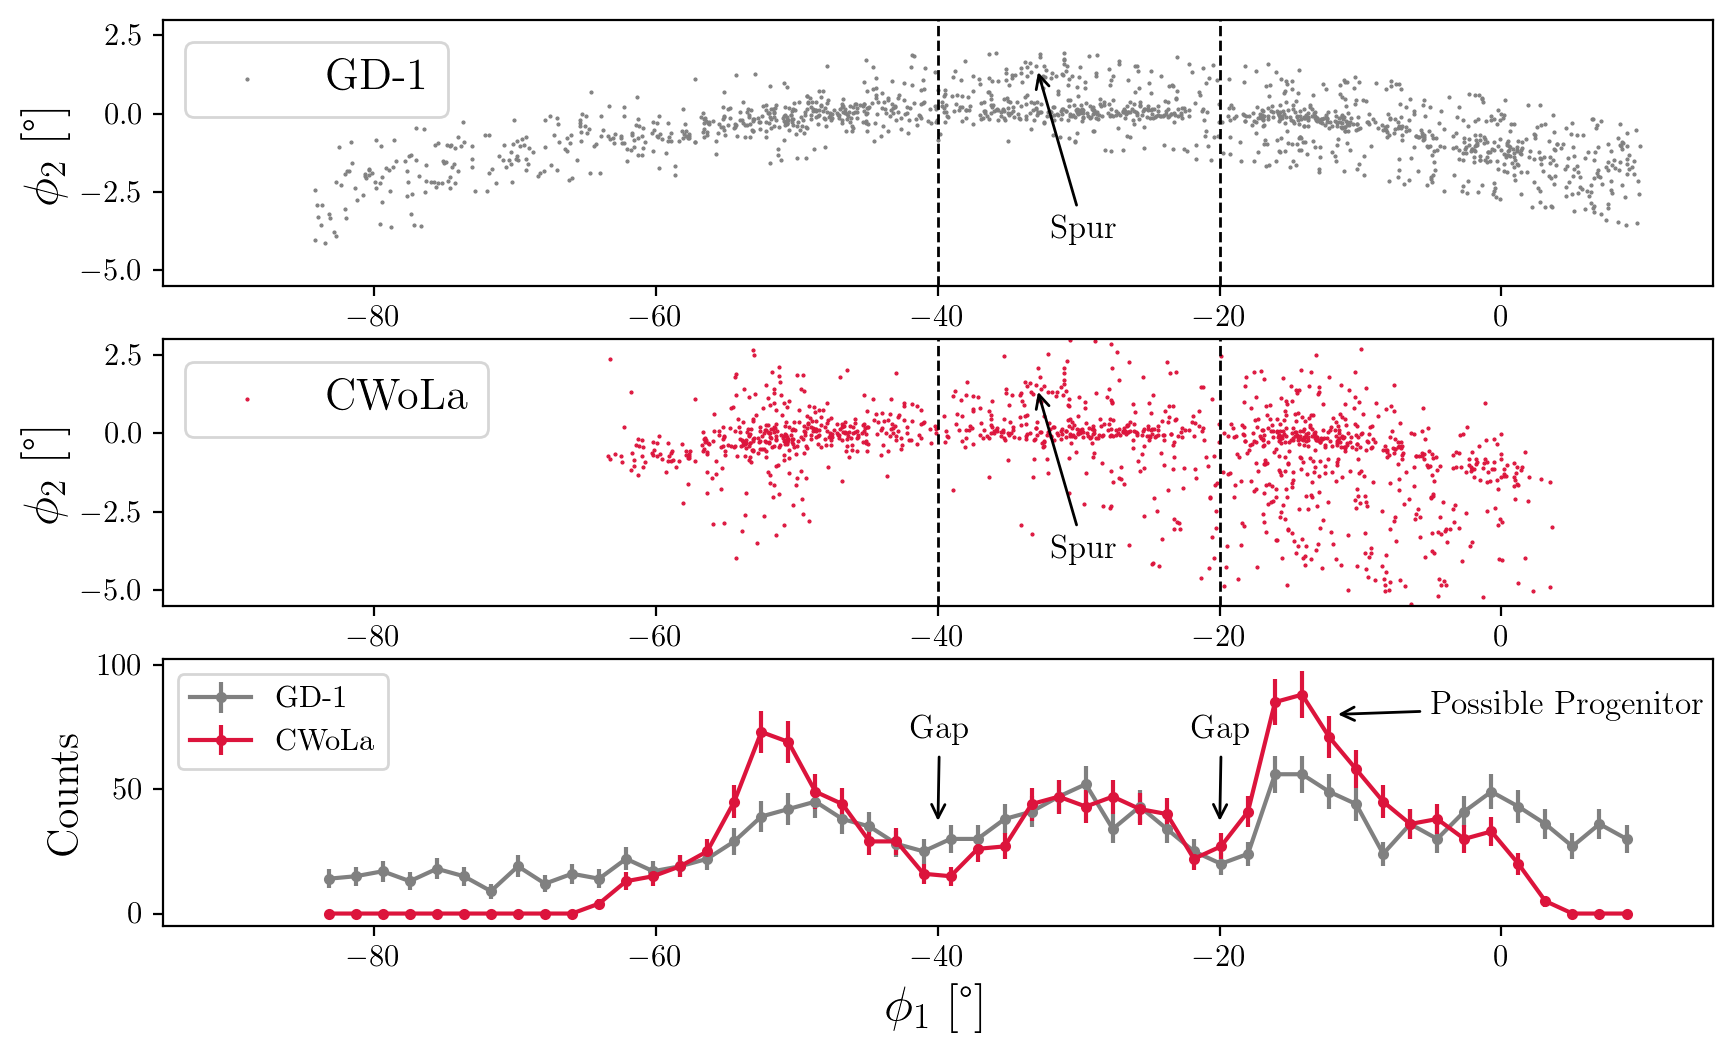

In [471]:
markersize = 1
fig, axs = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(10,6))

ax = axs[0]
ax.scatter(all_gd1_stars['ϕ1'], all_gd1_stars['ϕ2'], marker='.', s=markersize, color="gray", label="GD-1")
ax.legend(fontsize=16)
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
ax.axvline(-40,c='k',linestyle='dashed',lw=1)
ax.axvline(-20,c='k',linestyle='dashed',lw=1)
# ax.axvline(-14,c='k',lw=1)
ax.annotate('Spur', fontsize=12, xy=(-33,1.5), xytext=(-32,-4), arrowprops=dict(arrowstyle='->'))
# ax.arrow(-30,-2,-2.7,2.5,width=0.1,color='k')
# ax.text(-31,-2.8,'Spur', fontsize=14)
ax.set_ylim(-5.5,3)
ax.set_xlim(-95,15)
# ax.text(-14+0.5,-5,'``Blob", or possible progenitor',rotation=0, fontsize=14)

ax = axs[1]
ax.scatter(all_cwola_stars['ϕ1'], all_cwola_stars['ϕ2'], marker='.', s=markersize, color="crimson", label="CWoLa")
ax.legend(fontsize=16)
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_ylabel(r"$\phi_2$ [\textdegree]", fontsize=18);
ax.set_ylim(-5.5,3)
ax.set_xlim(-95,15)
ax.axvline(-40,c='k',linestyle="dashed",lw=1)
ax.axvline(-20,c='k',linestyle="dashed",lw=1)

# ax.arrow(-30,-3,-2.5,3.7,width=0.1,color='k')
ax.annotate('Spur', fontsize=12, xy=(-33,1.5), xytext=(-32,-4), arrowprops=dict(arrowstyle='->'))
# ax.arrow(-30,-3.5,-2,2,width=0.1,color='k', head_width = 1, head_length = 1)

# ax.text(-32,-3.8,'Spur', fontsize=14)
# ax.axvline(-14,c='k',lw=1)

ax = axs[2]
ax.set_xlabel(r"$\phi_1$ [\textdegree]", fontsize=18);
ax.set_xlim(-95,15);

bins = np.linspace(np.min(all_gd1_stars['ϕ1']),np.max(all_gd1_stars['ϕ1']),50)
counts_gd1, _   = np.histogram(all_gd1_stars['ϕ1'], bins=bins) 
counts_cwola, _ = np.histogram(all_cwola_stars['ϕ1'], bins=bins) 
ax.errorbar(0.5*(bins[1:]+bins[:-1]),counts_gd1, yerr=np.sqrt(counts_gd1),  marker='.',c='gray', label='GD-1')
ax.errorbar(0.5*(bins[1:]+bins[:-1]),counts_cwola, yerr=np.sqrt(counts_cwola), marker='.', c='crimson', label='CWoLa')
ax.legend(loc='upper left');
# ax.axvline(-14,c='k',lw=1)
# ax.axvline(-20,c='k',linestyle="dashed",lw=1)
# ax.axvline(-40,c='k',linestyle="dashed",lw=1)
ax.annotate('Gap', fontsize=12, xy=(-40,35), xytext=(-42,70), arrowprops=dict(arrowstyle='->'))
ax.annotate('Gap', fontsize=12, xy=(-20,35), xytext=(-22,70), arrowprops=dict(arrowstyle='->'))
ax.annotate('Possible Progenitor', fontsize=12, xy=(-12,80), xytext=(-5,80), arrowprops=dict(arrowstyle='->'))

# ax.text(-40-2.5,80,'Gap',rotation=0, fontsize=14)
# ax.text(-20-2.5,80,'Gap',rotation=0, fontsize=14)
# ax.arrow(-40,75,0,-30,width=0.1,color='k', head_width = 1, head_length = 5)
# ax.arrow(-20,75,0,-30,width=0.1,color='k', head_width = 1, head_length = 5)
ax.set_ylabel('Counts');
# ax.set_ylim(0,80);
plt.savefig("../plots/stream_frame.pdf")

# Figure 8

In [391]:
labeled = all_cwola_stars[all_cwola_stars.stream]
unlabeled = all_cwola_stars[all_cwola_stars.stream == False]

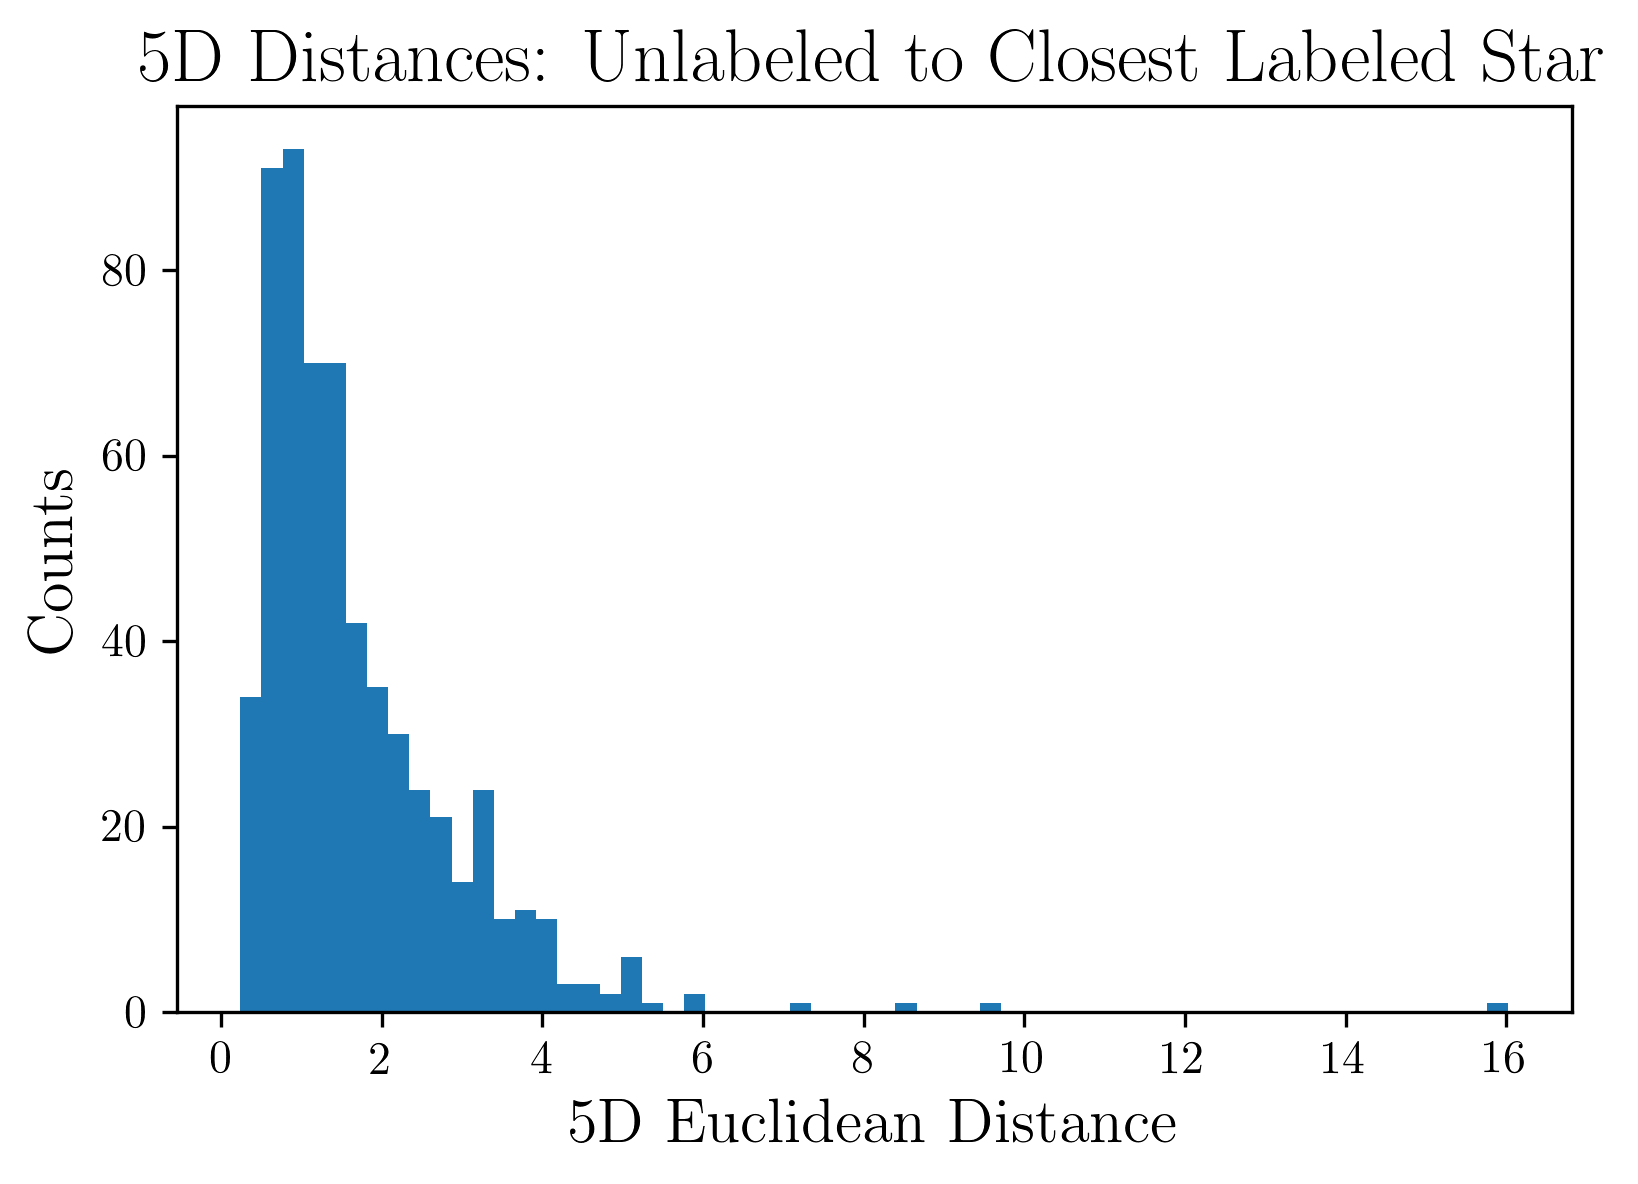

In [392]:
from scipy.spatial import distance_matrix
cols = ["μ_ϕcosλ", "δ", "α", "b-r", "g"]
dists = distance_matrix(labeled[cols].to_numpy(), unlabeled[cols].to_numpy())
closest_labeled = labeled.iloc[dists.argmin(axis=0)]
deltas = unlabeled[cols].to_numpy()-closest_labeled[cols].to_numpy()
distances = np.sqrt(np.sum(deltas**2, axis=1))
unlabeled['5d_distance'] = distances

plt.figure(dpi=300)
plt.hist(unlabeled["5d_distance"], bins=60)
plt.title("5D Distances: Unlabeled to Closest Labeled Star");
plt.ylabel("Counts")
plt.xlabel("5D Euclidean Distance");
# plt.savefig("../plots/5d_distance.png")

In [393]:
# promising = unlabeled[(unlabeled['5d_distance'] < 1)] # restrict by a specific distance
promising = unlabeled[(unlabeled['5d_distance'] < unlabeled['5d_distance'].quantile(0.1))] # restrict to the top x%

In [394]:
len(promising)

60

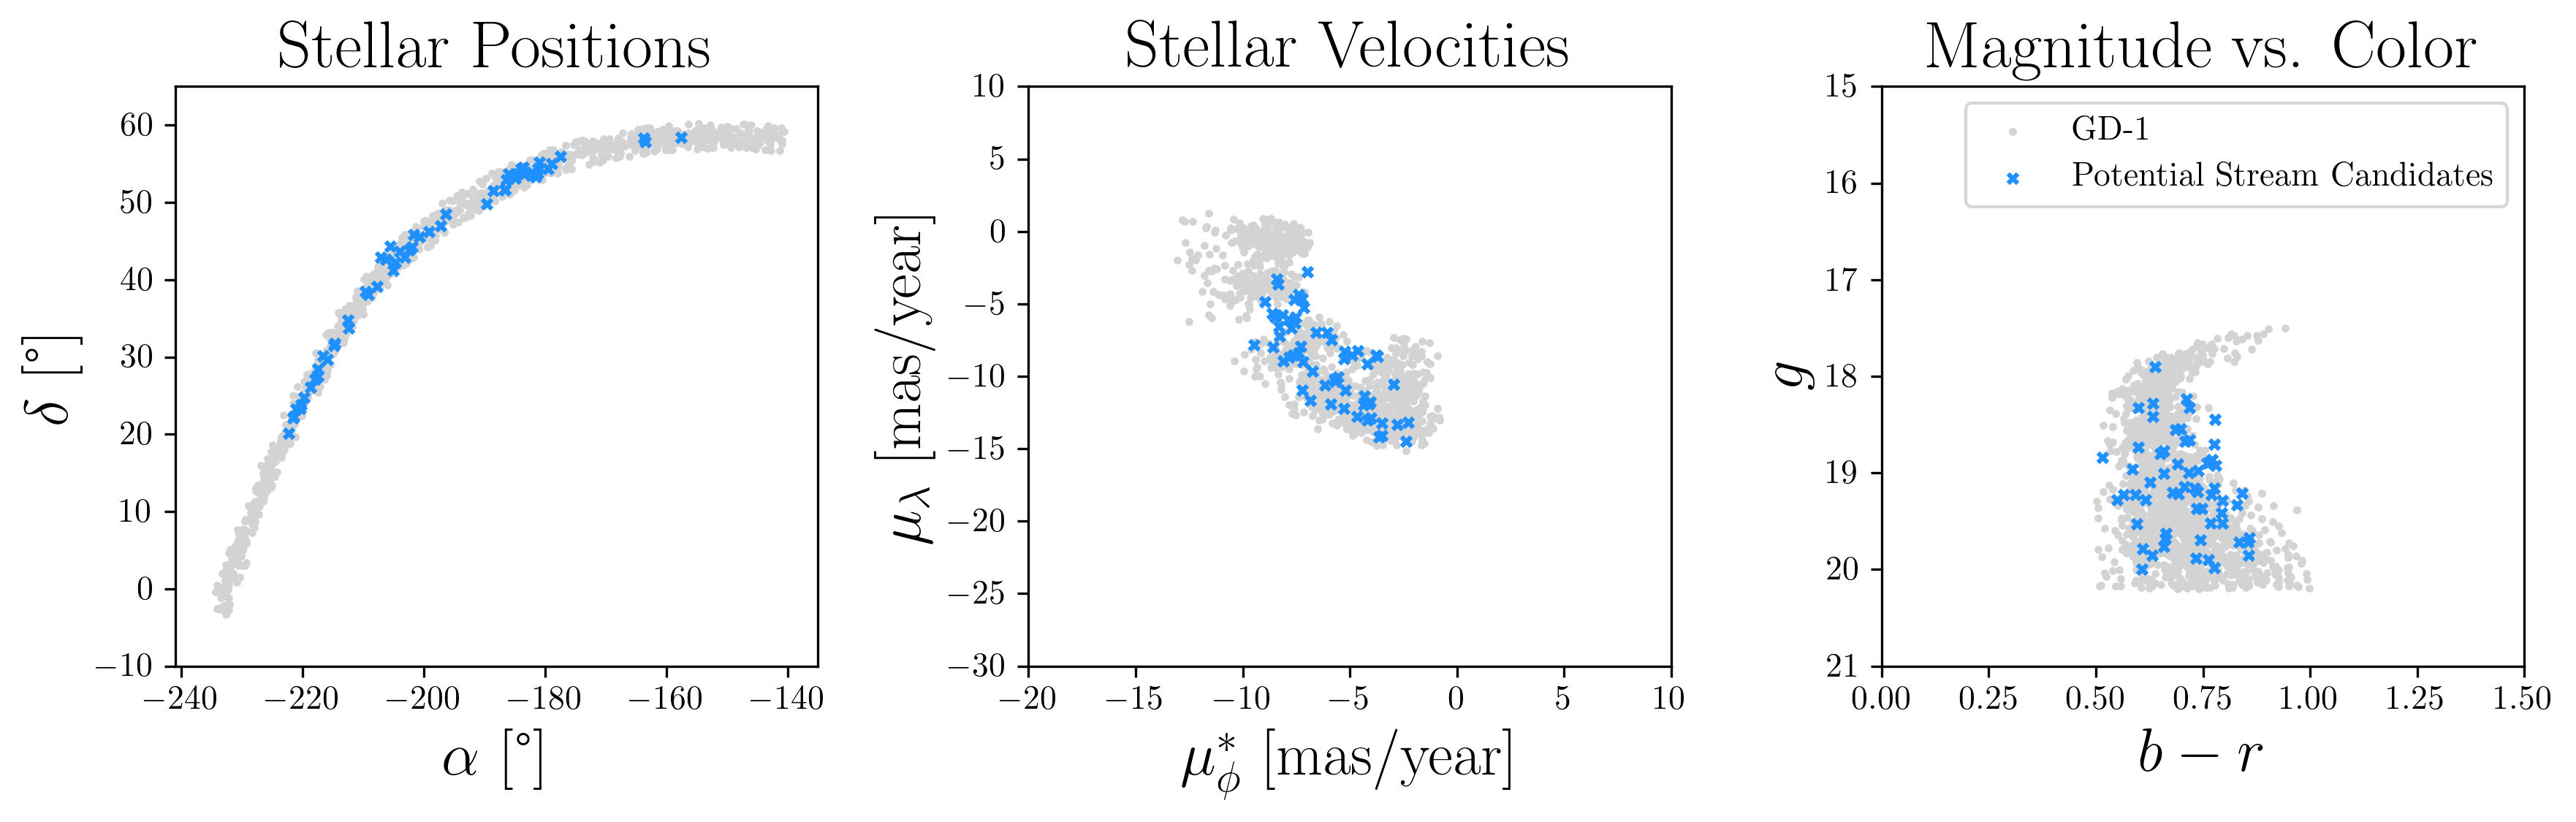

In [395]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(12,4), dpi=300, tight_layout=True)

markersize=10

ax = axs[0]
ax.set_title("Stellar Positions", fontsize=22)
ax.scatter(all_gd1_stars.α_wrapped - 360, all_gd1_stars.δ, color = "lightgray", marker='.', s=markersize, label="GD-1")
# ax.scatter(labeled.α_wrapped - 360, labeled.δ, marker='.', color="crimson",s=markersize, label="CWoLa-Identified GD-1 Matches")
ax.scatter(promising.α_wrapped - 360, promising.δ, marker='x', color="dodgerblue", s=markersize, label="Potential Stream Candidates")
ax.set_xlim(-241,-135);
ax.set_ylim(-10,65);
ax.set_xlabel(r"$\alpha$ [\textdegree]", fontsize=20)
ax.set_ylabel(r"$\delta$ [\textdegree]", fontsize=20);

ax = axs[1]
ax.set_title("Stellar Velocities", fontsize=22)
ax.scatter(all_gd1_stars['μ_ϕcosλ'], all_gd1_stars.μ_λ,  s=markersize, color = "lightgray", marker='.', label="GD-1")
# ax.scatter(labeled['μ_ϕcosλ'], labeled.μ_λ, marker='.', s=markersize, color="crimson", label="CWoLa-Identified GD-1 Matches")
ax.scatter(promising['μ_ϕcosλ'], promising.μ_λ, marker='x', s=markersize, color="dodgerblue", label="Potential Stream Candidates")
ax.set_xlim(-20,10);
ax.set_ylim(-30,10);
ax.set_xlabel(r"$\mu_{\phi}^*$ [mas/year]", fontsize=20)
ax.set_ylabel(r"$\mu_{\lambda}$ [mas/year]", fontsize=20);

ax = axs[2]
ax.set_title("Magnitude vs. Color", fontsize=22)
ax.scatter(all_gd1_stars['b-r'], all_gd1_stars.g, s=markersize, color = "lightgray", marker='.', label="GD-1")
# ax.scatter(labeled['b-r'], labeled.g, marker='.', s=markersize, color="crimson", alpha=1, label="CWoLa-Identified GD-1 Matches")
ax.scatter(promising['b-r'], promising.g, marker='x', s=markersize, color="dodgerblue", label="Potential Stream Candidates")
ax.set_xlabel(r"$b-r$", fontsize=20)
ax.set_ylabel(r"$g$", fontsize=20);
ax.set_xlim(0,1.5);
ax.set_ylim(15,21);
ax.invert_yaxis();
ax.legend()

plt.savefig("../plots/promising_triptych.pdf")